# Railway Incidents Data - Exploring Relationships

## This script contains the following points:
1. Importing Libraries
2. Importing Data
3. Checking Data
4. Correlation Matrix Heatmap
5. Scatterplot 
6. Pair plot 
7. Categorical plot
8. Hypotheses

# 1. Importing Libraries


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
%matplotlib inline

# 2. Importing Data


In [3]:
# Project folder path
path=r'C:\Users\maryn\Documents\Data Projects\Railway Incidents Data'

In [4]:
# Import dataset RID_clean_1.csv
df_RID = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'RID_clean_1.csv'), index_col = False)

# 3. Checking Data

In [5]:
df_RID.head()

,Unnamed: 0,reporting_railroad_code,railroad_name,year,accident_id,month,accident_type,state,fra_district,train_speed,temperature,visibility,weather_condition,has_passengers,damage_cost,persons_killed,persons_injured
0,0,NICD,Northern Indiana Commuter Transportation District,2017,N1700013,6,Derailment,ILLINOIS,4,10.0,65.0,Day,Clear,Yes,0.0,0.0,0.0
1,1,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017,201707188,6,Derailment,ILLINOIS,4,0.0,65.0,Day,Clear,Unknown,0.0,0.0,0.0
2,2,CR,Conrail,1981,0420001,4,Side collision,NEW YORK,1,0.0,28.0,Day,Snow,No,0.0,0.0,0.0
3,3,IC,Illinois Central Railroad Company,2007,543854,1,Derailment,LOUISIANA,5,4.0,56.0,Day,Cloudy,No,0.0,0.0,0.0
4,4,IC,Illinois Central Railroad Company,2017,938223,10,Hwy-rail crossing,ILLINOIS,4,0.0,66.0,Dark,Clear,No,0.0,0.0,1.0


In [6]:
# Drop the 'Unnamed: 0' column
df_RID.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Check the data types of columns
df_RID.dtypes

reporting_railroad_code     object
railroad_name               object
year                         int64
accident_id                 object
month                        int64
accident_type               object
state                       object
fra_district                 int64
train_speed                float64
temperature                float64
visibility                  object
weather_condition           object
has_passengers              object
damage_cost                float64
persons_killed             float64
persons_injured            float64
dtype: object

In [9]:
df_RID.shape

(210666, 16)

In [8]:
# Drop non-numeric columns
df_RID_numeric = df_RID.select_dtypes(include=[float, int])

In [10]:
df_RID_numeric.shape

(210666, 8)

# 4. Correlation Matrix Heatmap

In [11]:
# Calculate the correlation matrix
df_RID_numeric.corr()

,year,month,fra_district,train_speed,temperature,damage_cost,persons_killed,persons_injured
year,1.000000,0.002375,0.058005,-0.000502,0.105432,-0.013201,0.019719,0.006804
month,0.002375,1.000000,0.007284,-0.006220,0.201842,0.003131,0.003482,-0.002257
fra_district,0.058005,0.007284,1.000000,0.008538,0.021232,0.000215,0.003284,-0.015372
train_speed,-0.000502,-0.006220,0.008538,1.000000,-0.007371,-0.007627,0.130523,0.057364
temperature,0.105432,0.201842,0.021232,-0.007371,1.000000,-0.003004,0.013515,0.002068
damage_cost,-0.013201,0.003131,0.000215,-0.007627,-0.003004,1.000000,0.000162,-0.000666
persons_killed,0.019719,0.003482,0.003284,0.130523,0.013515,0.000162,1.000000,0.221800
persons_injured,0.006804,-0.002257,-0.015372,0.057364,0.002068,-0.000666,0.221800,1.000000


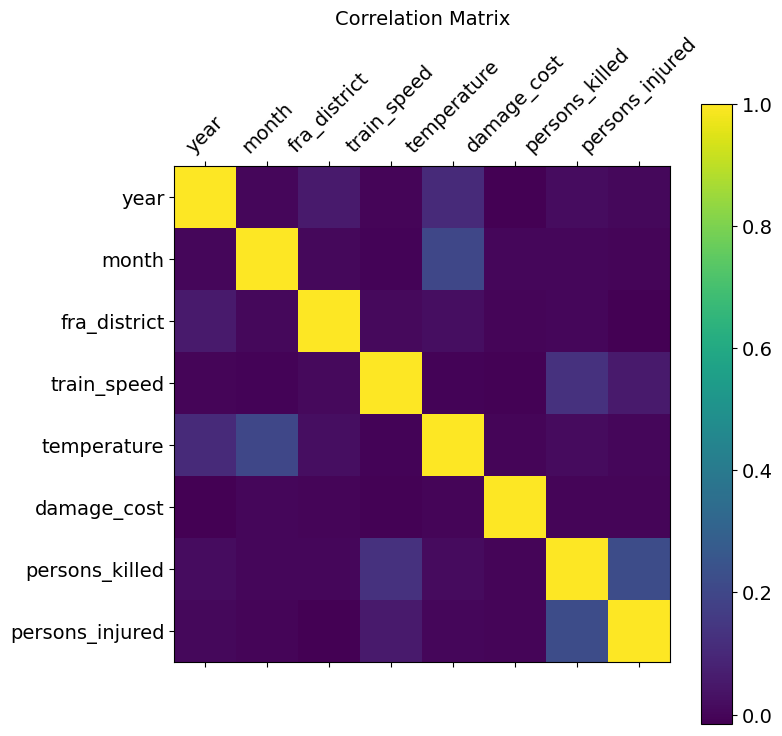

In [20]:
# Create a correlation heatmap 
f = plt.figure(figsize=(8, 8))
plt.matshow(df_RID_numeric.corr(), fignum=f.number)
plt.xticks(range(df_RID_numeric.shape[1]), df_RID_numeric.columns, fontsize=14, rotation=45) 
plt.yticks(range(df_RID_numeric.shape[1]), df_RID_numeric.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

### Most of the variables have very weak correlations with each other (close to 0), indicating little to no linear relationship.
### The highest positive correlation observed is between persons killed and persons injured (0.221800), though this is still a weak correlation.

# 5. Scatterplot

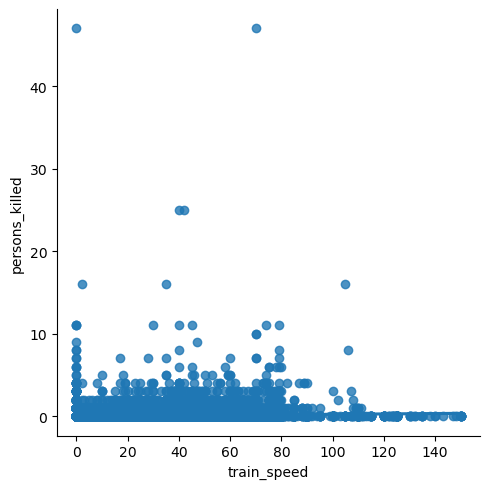

In [24]:
# Create a scatterplot for the "train_speed" and "persons_killed" columns in seaborn
sns.lmplot(x = 'train_speed', y = 'persons_killed', data = df_RID)

plt.savefig('scp_speed_deaths.png', dpi=300, bbox_inches='tight')

### There is no clear linear relationship between train speed and number of persons killed. The points are widely dispersed, especially at lower train speeds.
### The significant outliers, such as a few accidents with more than 10 persons killed, are visible. These outliers occur at different train speeds, suggesting that exceptionally severe accidents can occur at both low and high speeds.

### Possible Hypotheses:
### Null Hypothesis (H0): Train speed does not significantly affect the number of persons killed in train accidents.
### Alternative Hypothesis (H1): Train speed significantly affects the number of persons killed in train accidents.

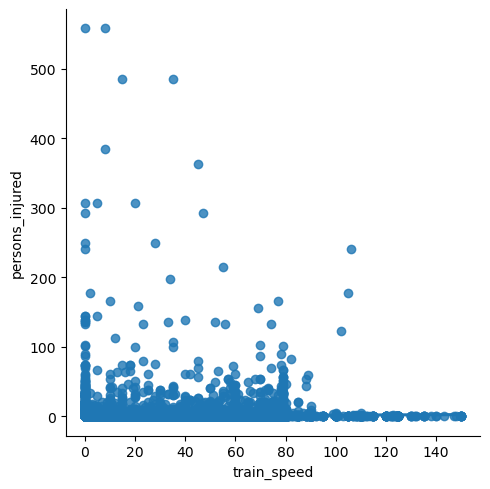

In [25]:
# Create a scatterplot for the "train_speed" and "persons_injured" columns in seaborn
sns.lmplot(x = 'train_speed', y = 'persons_injured', data = df_RID)
plt.savefig('scp_speed_injuries.png', dpi=300, bbox_inches='tight')

### There is no clear linear relationship between train speed and number of persons injured. The points are widely dispersed, especially at lower train speeds.
### There are significant outliers, such as few accidents with more than 100 persons injured. These outliers occur at different train speeds, suggesting that exceptionally severe accidents can occur at both low and high speeds.

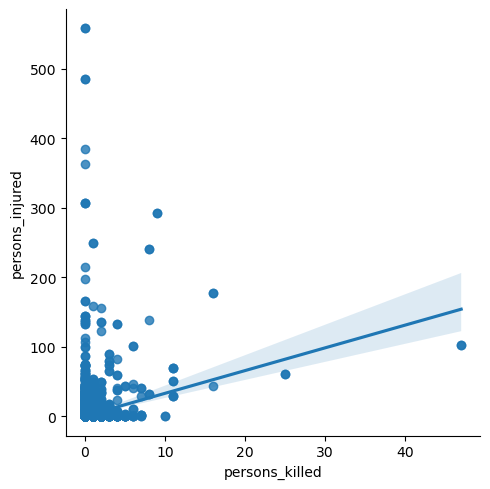

In [26]:
# Create a scatterplot for the "persons_killed" and "persons_injured" columns in seaborn
sns.lmplot(x = 'persons_killed', y = 'persons_injured', data = df_RID)
plt.savefig('scp_deaths_injuries.png', dpi=300, bbox_inches='tight')

### he scatterplot shows a positive correlation between the number of persons killed and the number of persons injured. This means that, in general, as the number of persons killed in an accident increases, the number of persons injured also tends to increase.

### The confidence interval around the regression line widens as the number of persons killed increases, indicating greater uncertainty in the predicted number of persons injured for higher numbers of fatalities. This could be due to the smaller number of data points with high fatalities.

# 6. Pair plot

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

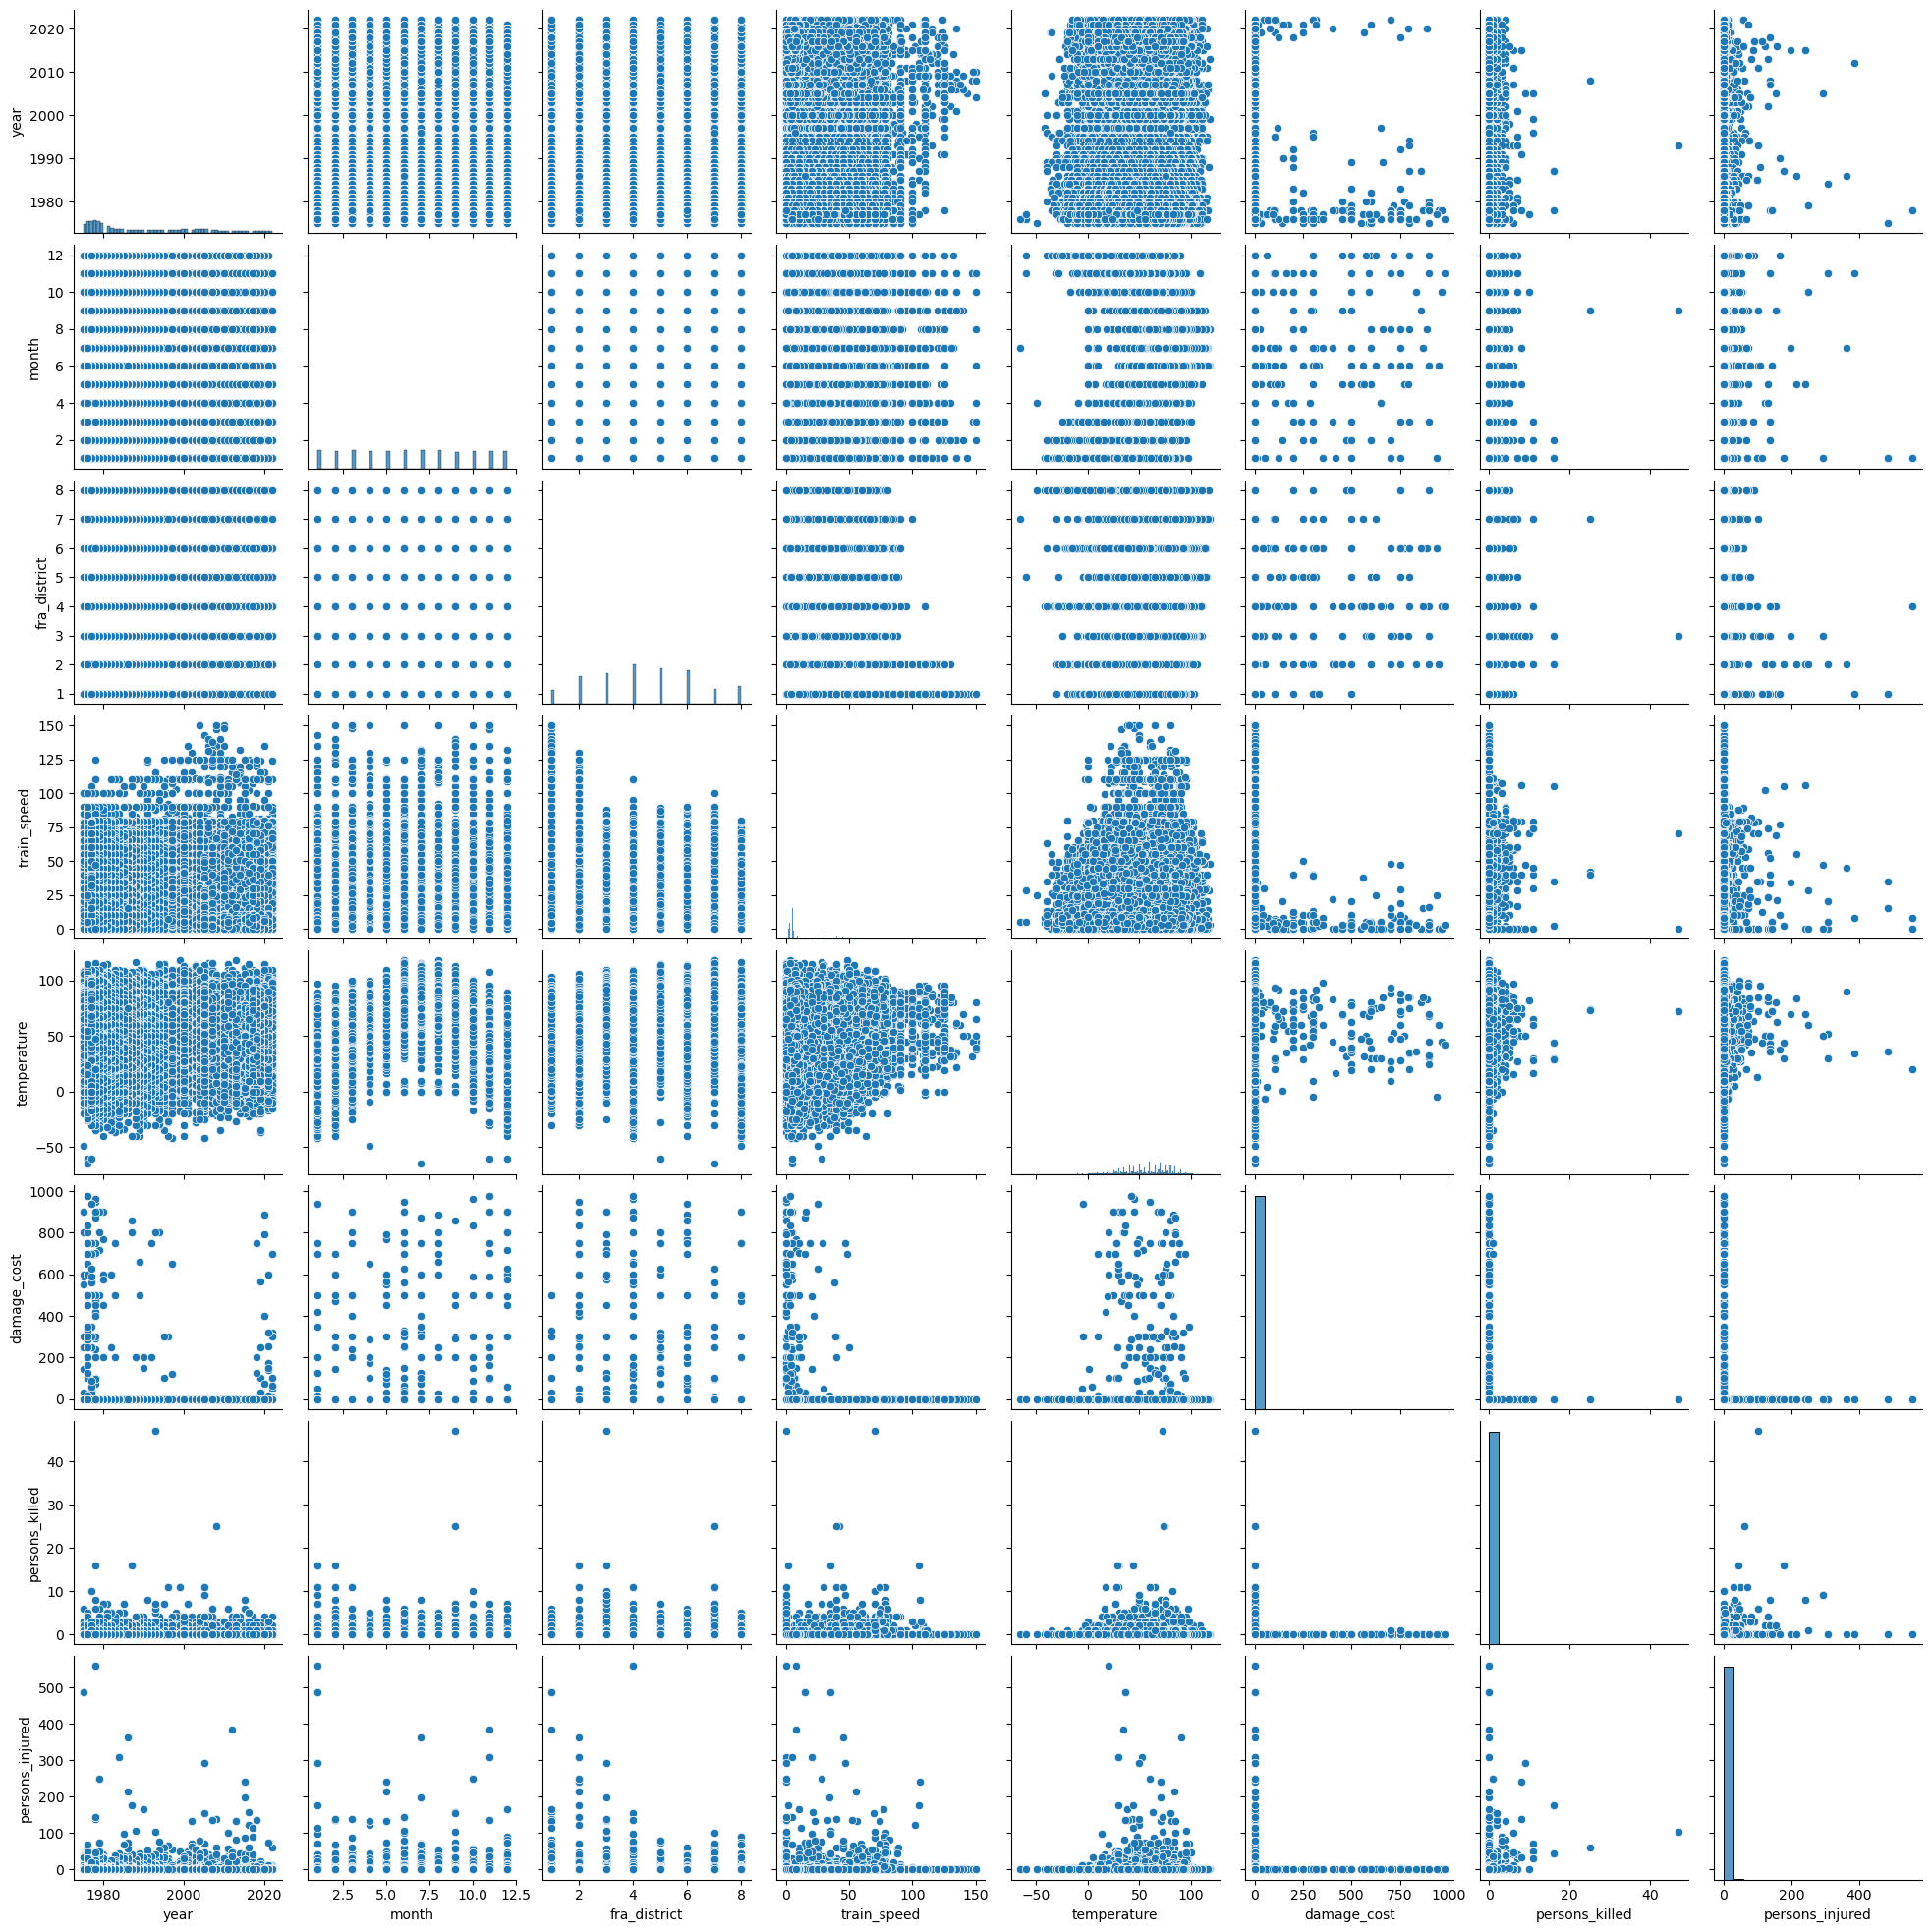

In [29]:
# Create a pair plot 
g = sns.pairplot(df_RID_numeric)

### The scatter plots with the year variable show some interesting patterns, especially with variables such as train_speed and damage_cost. Examining how these variables have changed over time could provide insights into trends and improvements in railway safety.

# 7. Categorical plot

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='train_speed', ylabel='Count'>

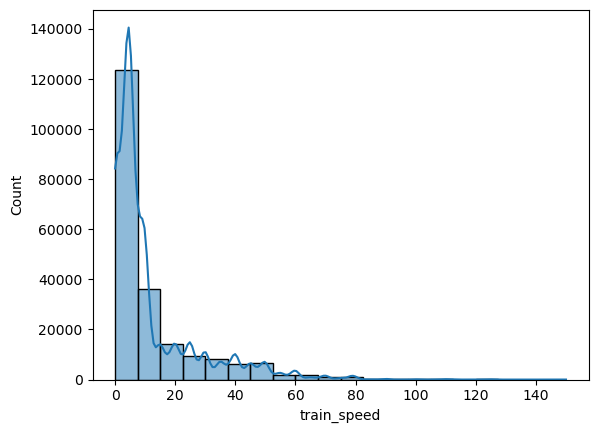

In [30]:
# Use a histogram to visualize the distribution of the 'train_speed' variable 
sns.histplot(df_RID_numeric['train_speed'], bins = 20, kde = True)

In [31]:
# Create a 'Train speed category' flag
df_RID_numeric.loc[df_RID_numeric['train_speed'] < 10, 'Train speed category'] = 'Low speed'
df_RID_numeric.loc[(df_RID_numeric['train_speed'] >= 10) & (df_RID_numeric['train_speed'] < 60), 'Train speed category'] = 'Middle speed'
df_RID_numeric.loc[df_RID_numeric['train_speed'] >= 60, 'Train speed category'] = 'High speed'

In [32]:
df_RID_numeric['Train speed category'].value_counts(dropna = False)

Train speed category
Low speed       137696
Middle speed     68771
High speed        4199
Name: count, dtype: int64

In [33]:
df_RID_numeric.columns

Index(['year', 'month', 'fra_district', 'train_speed', 'temperature',
       'damage_cost', 'persons_killed', 'persons_injured',
       'Train speed category'],
      dtype='object')

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

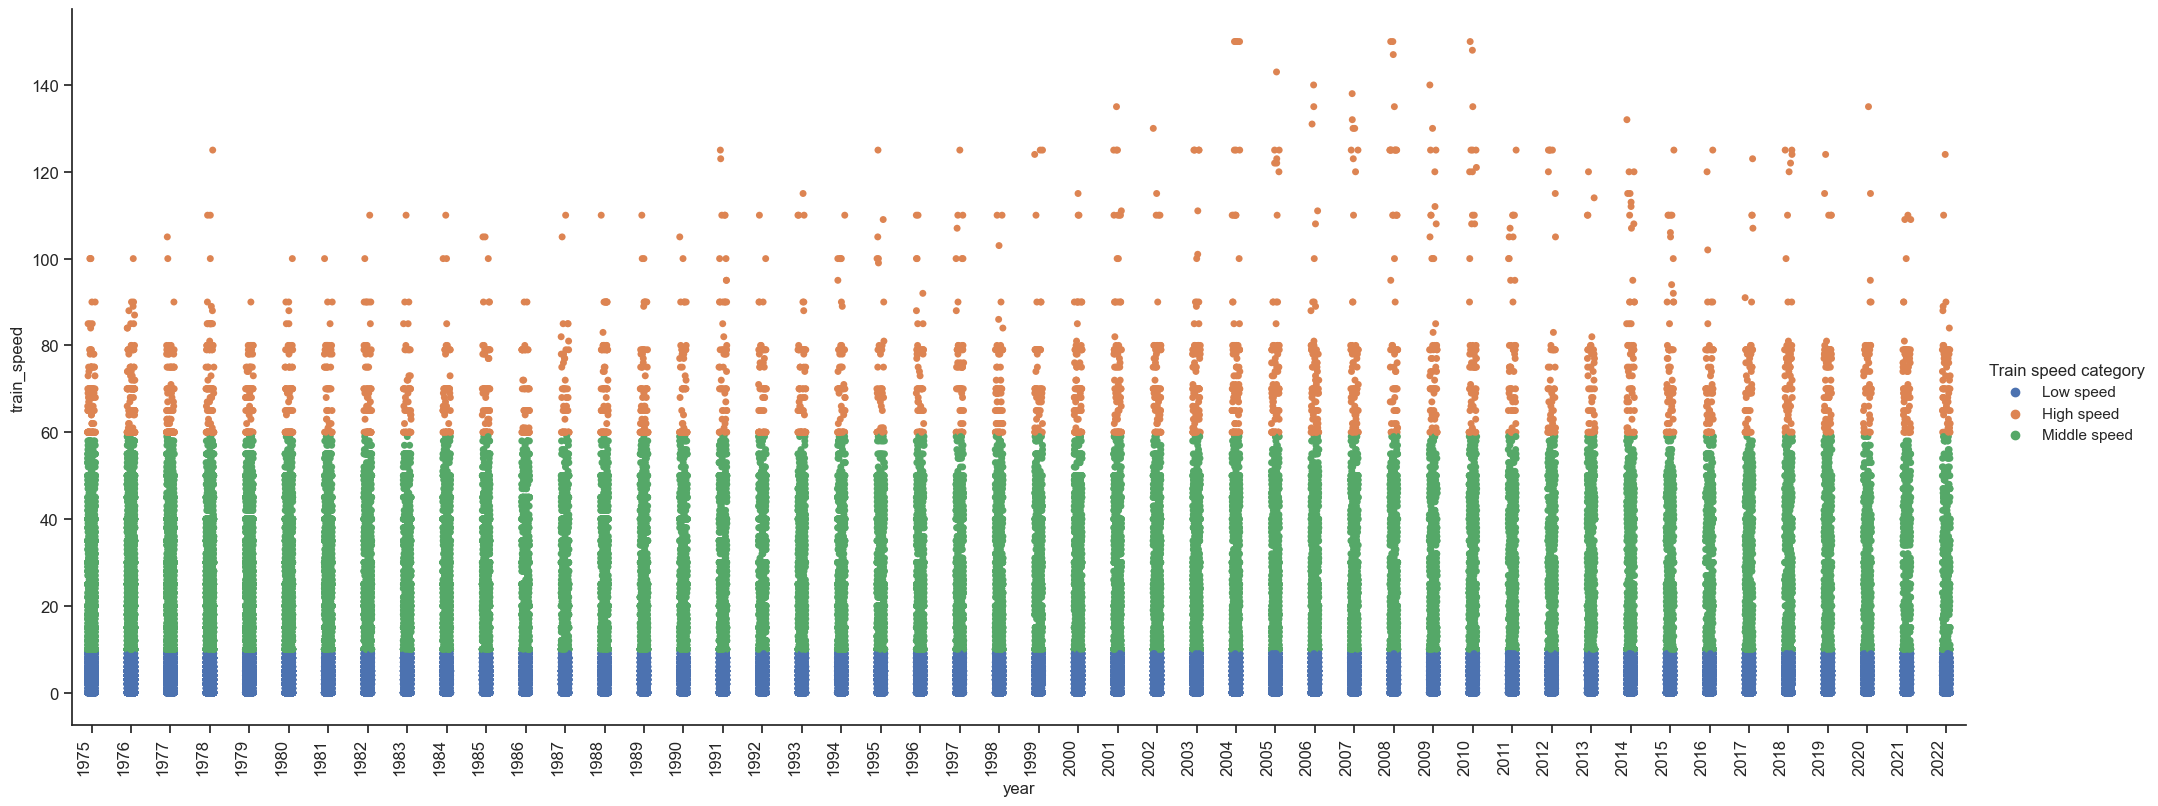

In [34]:
# Create a categorical plot in seaborn for variables 'year' and 'train_speed'
sns.set(style="ticks")
g = sns.catplot(x="year", y="train_speed", hue="Train speed category", data=df_RID_numeric, kind='strip', height=8, aspect=2.5)
plt.xticks(rotation = 90, ha ='right', fontsize = 12)
plt.yticks(fontsize = 12)

### This plot shows that railway accidents involving low, middle, and high speed trains have occurred consistently across the years from 1975 to 2022, with no significant shifts in the distribution of train speeds at the moment of the accidents, but with a greater number of outliers of the accidents involving train speeds above 110 mph.

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


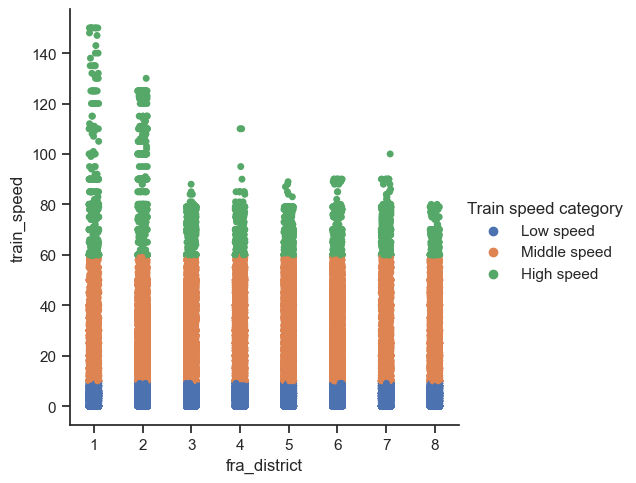

In [35]:
# Create a categorical plot in seaborn for variables 'fra_district' and 'train_speed'
sns.set(style="ticks")
g = sns.catplot(x="fra_district", y="train_speed", hue="Train speed category", data=df_RID_numeric)

### This plot shows that railway incidents across different FRA districts involve a mix of low, middle, and high-speed trains, with a notable concentration of high-speed incidents in districts 1 and 2, indicating potential regional variations in train speeds at the moment of incidents.

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

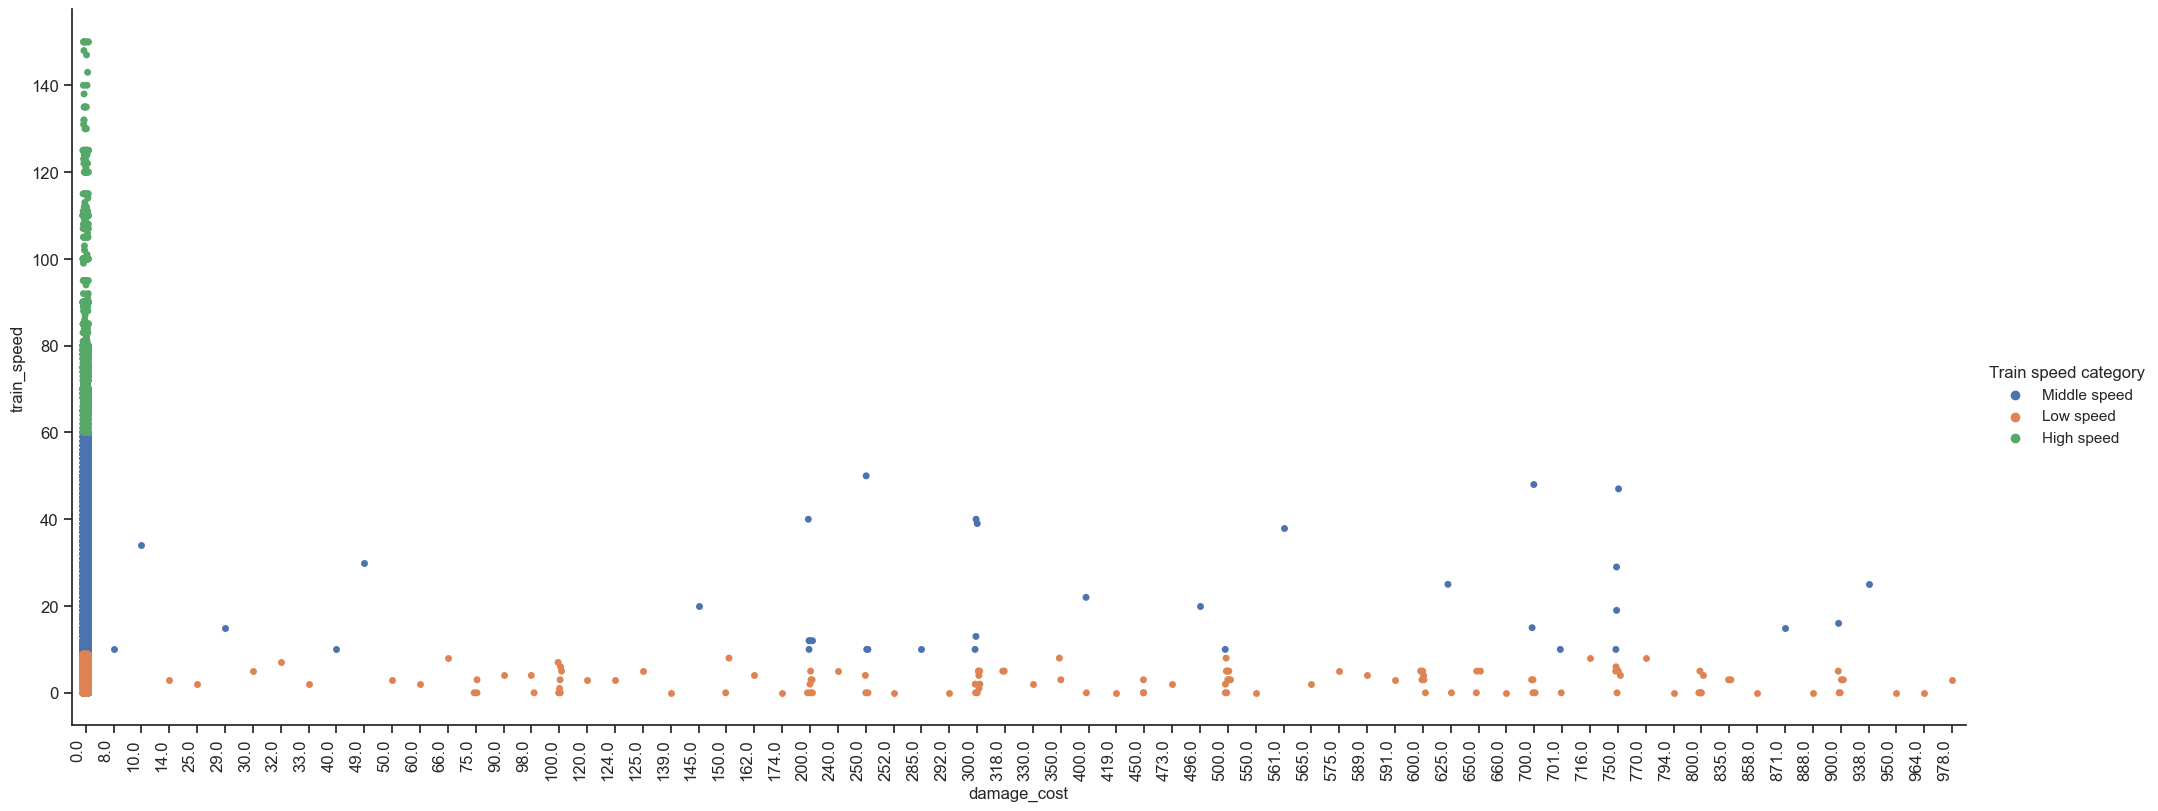

In [36]:
# Create a categorical plot in seaborn for variables 'damage_cost' and 'train_speed'
sns.set(style="ticks")
g = sns.catplot(x="damage_cost", y="train_speed", hue="Train speed category", data=df_RID_numeric , kind='strip', height=8, aspect=2.5)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

### This plot shows that railway incidents with higher damage costs predominantly involve low-speed trains, while high-speed and middle-speed trains are associated with lower damage costs, indicating a potential inverse relationship between train speed at the time of the incident and the financial impact of the damage.

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

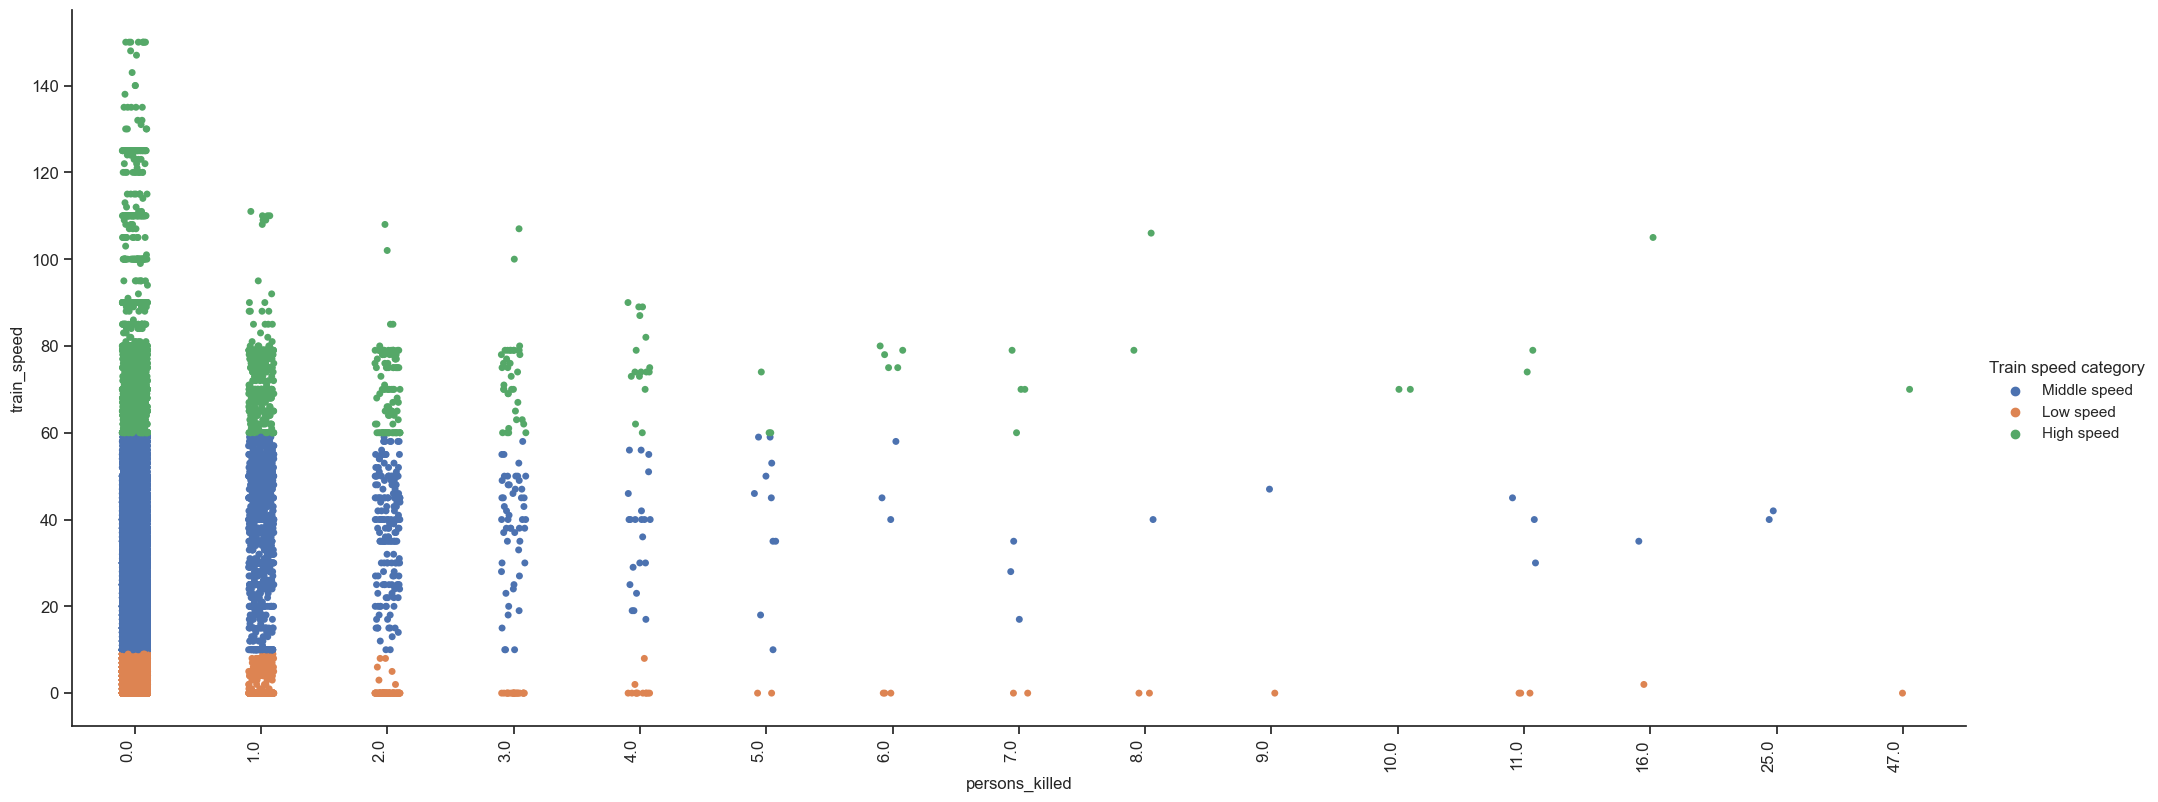

In [38]:
# Create a categorical plot in seaborn for variables 'persons_killed' and 'train_speed'
sns.set(style="ticks")
g = sns.catplot(x="persons_killed", y="train_speed", hue="Train speed category", data=df_RID_numeric , kind='strip', height=8, aspect=2.5)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)


### This  plot shows that railway incidents resulting in fatalities occur across all train speed categories, but incidents with higher numbers of fatalities (greater than 5) are predominantly associated with high-speed trains

C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

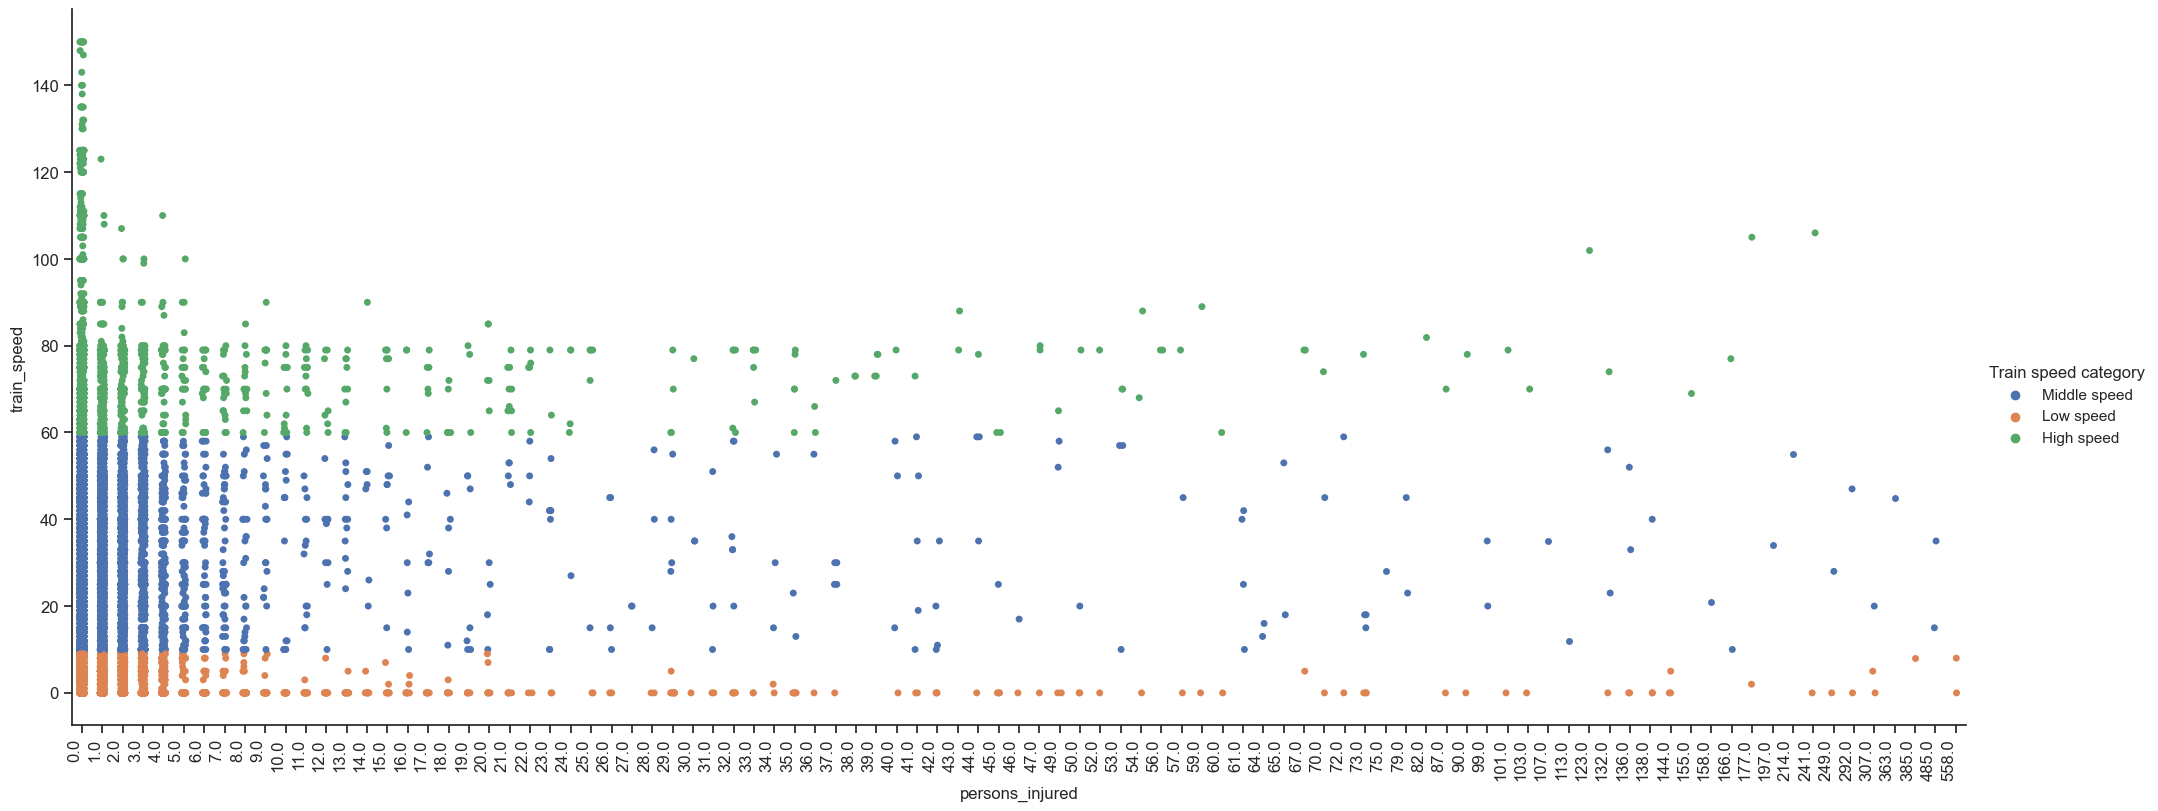

In [37]:
# Create a categorical plot in seaborn for variables 'persons_injured' and 'train_speed'
sns.set(style="ticks")
g = sns.catplot(x="persons_injured", y="train_speed", hue="Train speed category", data=df_RID_numeric , kind='strip', height=8, aspect=2.5)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

### The plot shows that railway incidents with a higher number of persons injured are more frequently associated with high-speed and middle-speed trains, while accidents with low-speed trains tend to result in fewer injuries. It could also be freight trains without passengers.

# 8. Hypotheses

### 1
### Null Hypothesis (H0): Train speed does not significantly affect the number of persons injured in train accidents.
### Alternative Hypothesis (H1): Train speed significantly affects the number of persons injured in train accidents.

### 2
### Null Hypothesis (H0): Train speed does not significantly affect the number of persons killed in train accidents.
### Alternative Hypothesis (H1): Train speed significantly affects the number of persons killed in train accidents.

### 3
### Null Hypothesis (H0): There are no significant differences in accident rates between different states or FRA districts### 	Alternative Hypothesis (H1): There are significant differences in accident rates between different stats or FRA districts


### 4
### Null Hypothesis (H0): There is no significant trend in the number of train accidents over the years.### 	Alternative Hypothesis (H1): There is a significant trend in the number of train accidents over the years.
